In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Loading Dataset

In [2]:
data = pd.read_csv("Churn_Example.csv",encoding='ISO-8859-1')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Exploratory Data Analysis

In [7]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

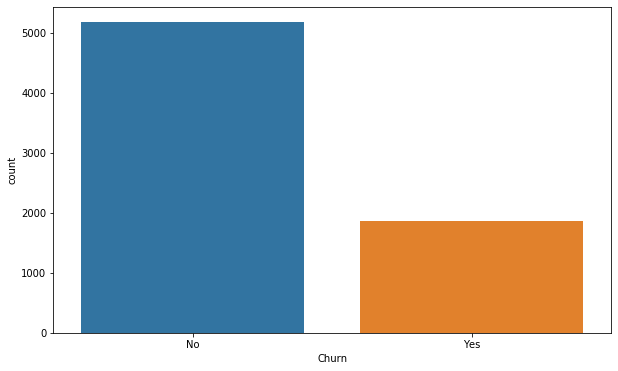

<Figure size 720x432 with 0 Axes>

In [8]:
sns.countplot(x='Churn', data=data)
plt.show()
plt.savefig('Churn_count_plot')

In [9]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
data.loc[data.Churn=='Yes','Churn'] = 1 
data.loc[data.Churn=='No','Churn'] = 0

In [11]:
count_no_churn = len(data[data['Churn']==0])
count_churn = len(data[data['Churn']==1])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
print("\033[1m percentage of no churn is\033[1m",pct_of_no_churn*100)
pct_of_churn = count_churn/(count_no_churn+count_churn)
print("\033[1m percentage of churn is\033[1m",pct_of_churn*100)

 percentage of no churn is 73.4630129206304
 percentage of churn is 26.536987079369588


Our classes are imbalanced, and the ratio of no-churn to churn instances is 73:27. Before we go ahead to balance the classes, let’s do some more exploration.

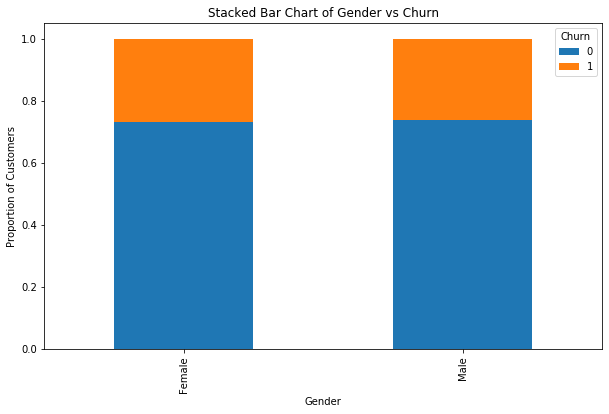

In [12]:
table=pd.crosstab(data.gender,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Proportion of Customers')
plt.savefig('gender_vs_pur_stack')

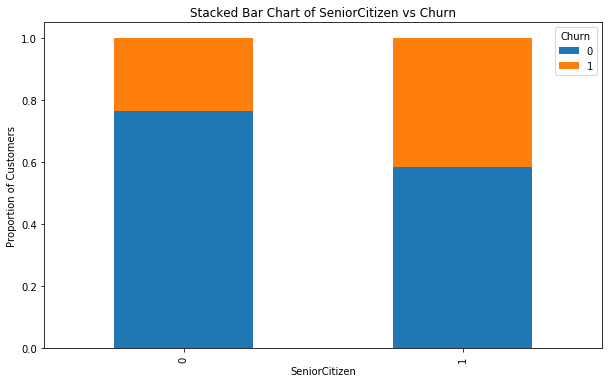

In [13]:
table=pd.crosstab(data.SeniorCitizen,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of SeniorCitizen vs Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Proportion of Customers')
plt.savefig('SeniorCitizen_vs_pur_stack')

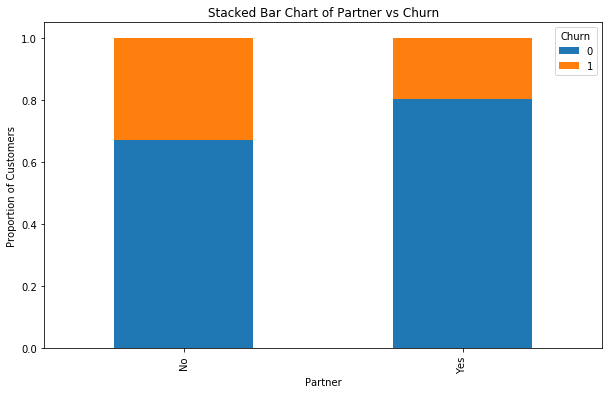

In [14]:
table=pd.crosstab(data.Partner,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Partner vs Churn')
plt.xlabel('Partner')
plt.ylabel('Proportion of Customers')
plt.savefig('Partner_vs_pur_stack')

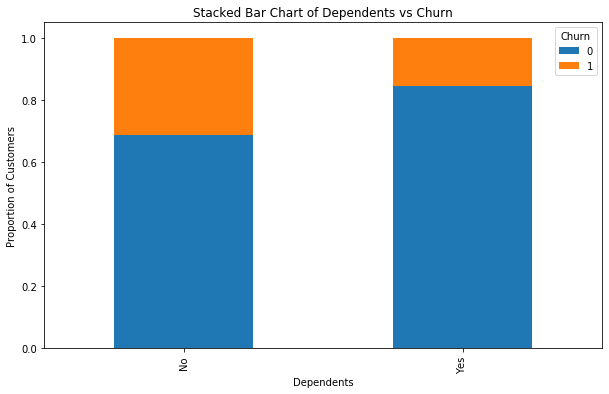

In [15]:
table=pd.crosstab(data.Dependents,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Dependents vs Churn')
plt.xlabel('Dependents')
plt.ylabel('Proportion of Customers')
plt.savefig('Dependents_vs_pur_stack')

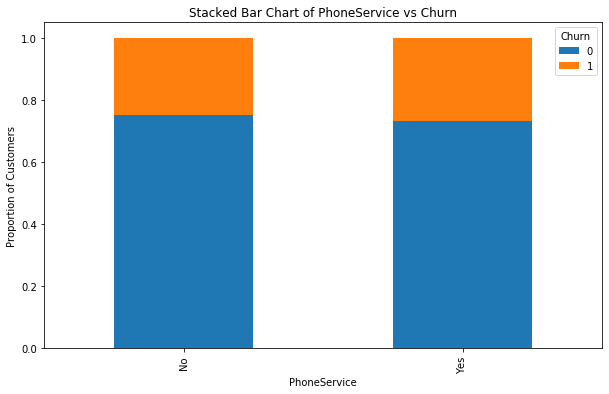

In [16]:
table=pd.crosstab(data.PhoneService,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of PhoneService vs Churn')
plt.xlabel('PhoneService')
plt.ylabel('Proportion of Customers')
plt.savefig('PhoneService_vs_pur_stack')

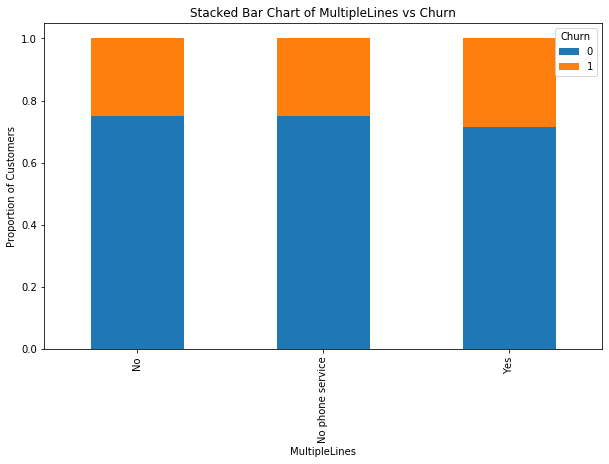

In [17]:
table=pd.crosstab(data.MultipleLines,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of MultipleLines vs Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Proportion of Customers')
plt.savefig('MultipleLines_vs_pur_stack')

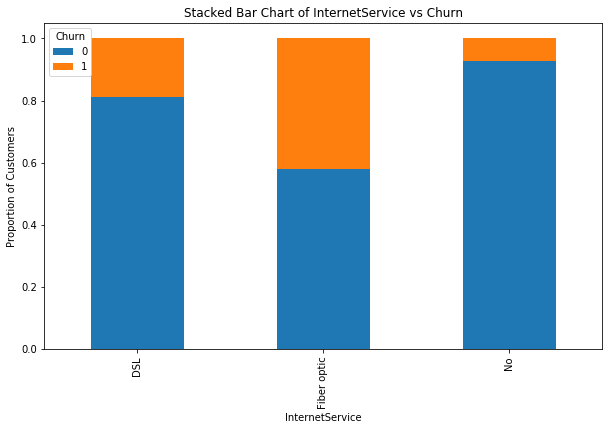

In [18]:
table=pd.crosstab(data.InternetService,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of InternetService vs Churn')
plt.xlabel('InternetService')
plt.ylabel('Proportion of Customers')
plt.savefig('InternetService_vs_pur_stack')

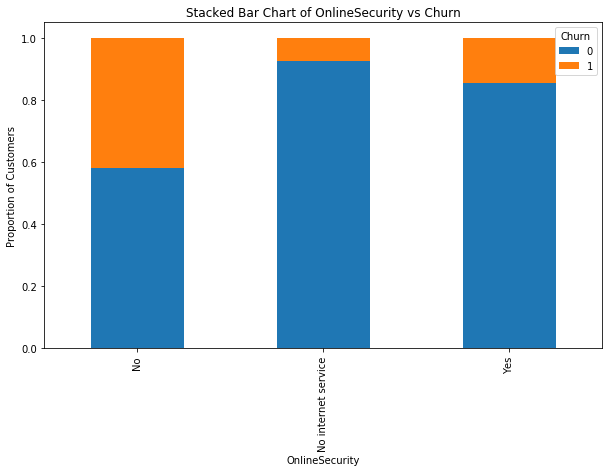

In [19]:
table=pd.crosstab(data.OnlineSecurity,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of OnlineSecurity vs Churn')
plt.xlabel('OnlineSecurity')
plt.ylabel('Proportion of Customers')
plt.savefig('OnlineSecurity_vs_pur_stack')

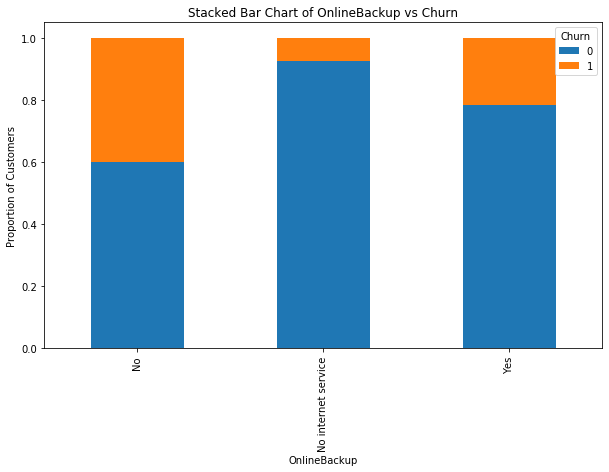

In [20]:
table=pd.crosstab(data.OnlineBackup,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of OnlineBackup vs Churn')
plt.xlabel('OnlineBackup')
plt.ylabel('Proportion of Customers')
plt.savefig('OnlineBackup_vs_pur_stack')

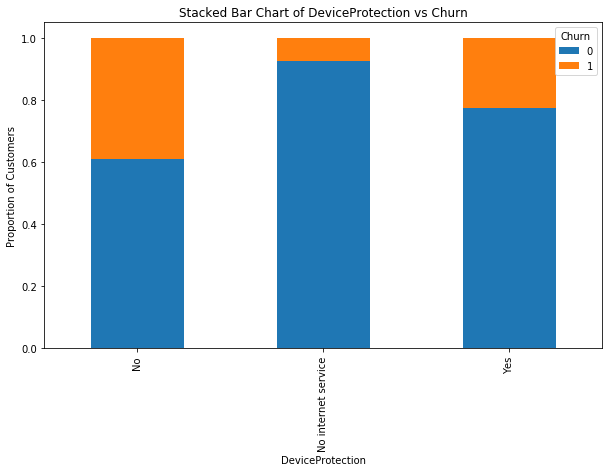

In [21]:
table=pd.crosstab(data.DeviceProtection,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of DeviceProtection vs Churn')
plt.xlabel('DeviceProtection')
plt.ylabel('Proportion of Customers')
plt.savefig('DeviceProtection_vs_pur_stack')

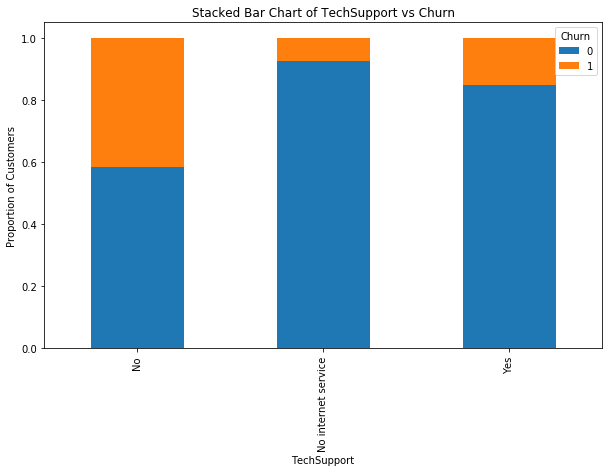

In [22]:
table=pd.crosstab(data.TechSupport,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of TechSupport vs Churn')
plt.xlabel('TechSupport')
plt.ylabel('Proportion of Customers')
plt.savefig('TechSupport_vs_pur_stack')

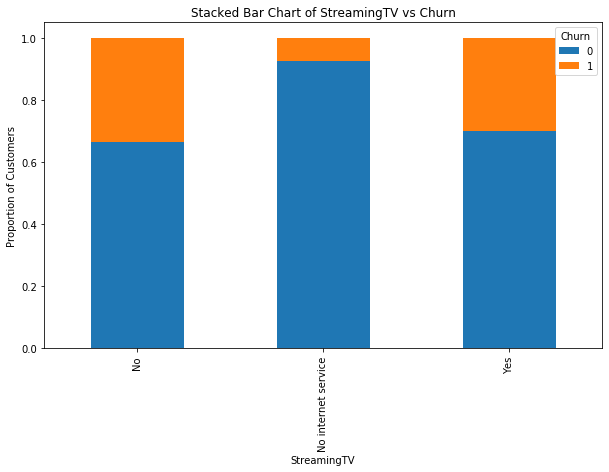

In [23]:
table=pd.crosstab(data.StreamingTV,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of StreamingTV vs Churn')
plt.xlabel('StreamingTV')
plt.ylabel('Proportion of Customers')
plt.savefig('StreamingTV_vs_pur_stack')

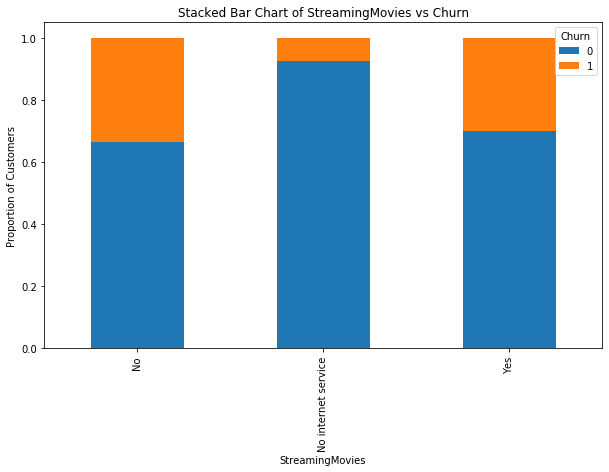

In [24]:
table=pd.crosstab(data.StreamingMovies,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of StreamingMovies vs Churn')
plt.xlabel('StreamingMovies')
plt.ylabel('Proportion of Customers')
plt.savefig('StreamingMovies_vs_pur_stack')

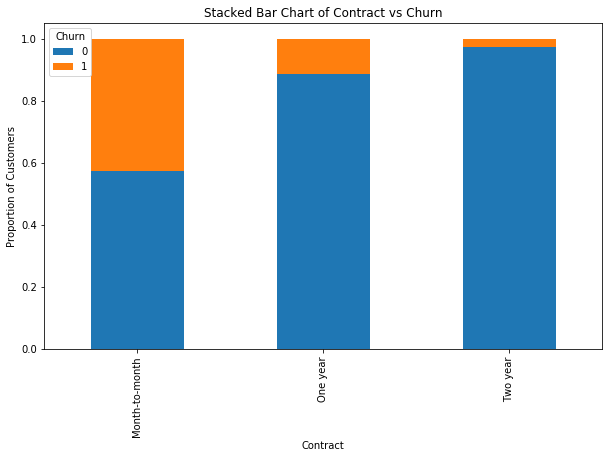

In [25]:
table=pd.crosstab(data.Contract,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Proportion of Customers')
plt.savefig('Contract_vs_pur_stack')

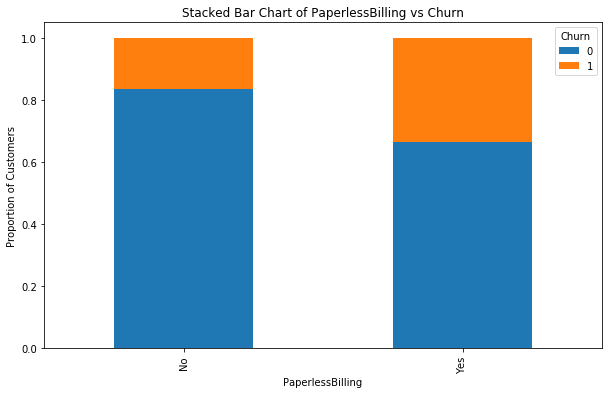

In [26]:
table=pd.crosstab(data.PaperlessBilling,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of PaperlessBilling vs Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Proportion of Customers')
plt.savefig('PaperlessBilling_vs_pur_stack')

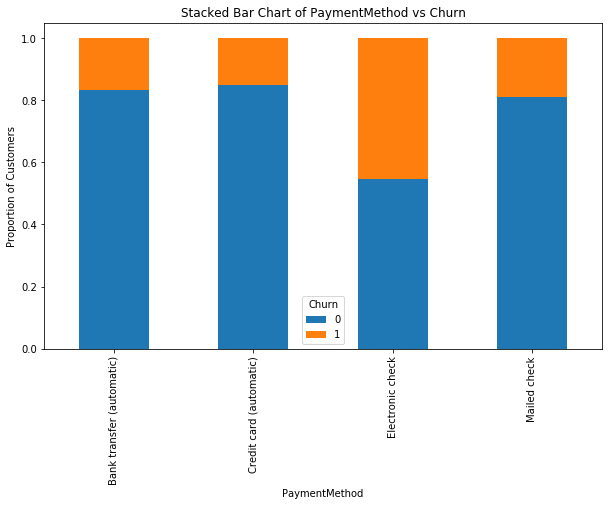

In [27]:
table=pd.crosstab(data.PaymentMethod,data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of PaymentMethod vs Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Proportion of Customers')
plt.savefig('PaymentMethod_vs_pur_stack')

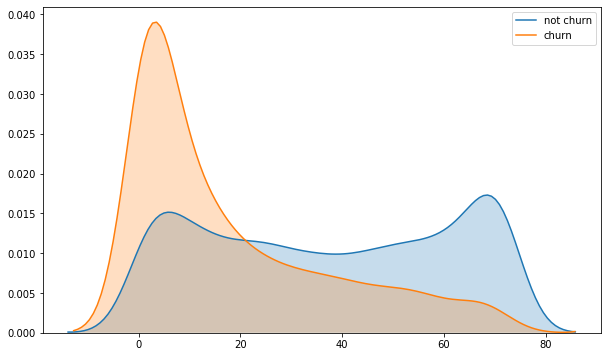

In [28]:
import seaborn as sns
sns.kdeplot(data['tenure'].loc[data['Churn'] == 0], label='not churn', shade=True);
sns.kdeplot(data['tenure'].loc[data['Churn'] == 1], label='churn', shade=True);

In [29]:
data['tenure'].loc[data['Churn'] == 0].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

In [30]:
data['tenure'].loc[data['Churn'] == 1].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

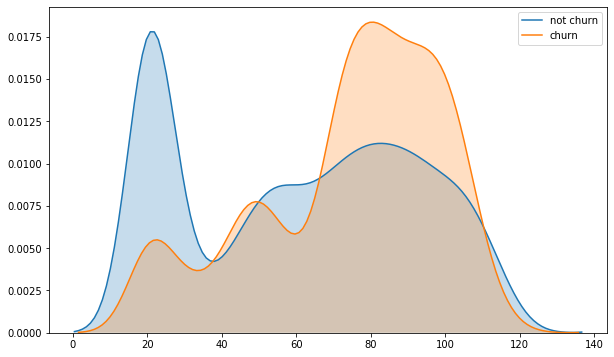

In [31]:
sns.kdeplot(data['MonthlyCharges'].loc[data['Churn'] == 0], label='not churn', shade=True);
sns.kdeplot(data['MonthlyCharges'].loc[data['Churn'] == 1], label='churn', shade=True);

In [32]:
data['MonthlyCharges'].loc[data['Churn'] == 0].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [33]:
data['MonthlyCharges'].loc[data['Churn'] == 1].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


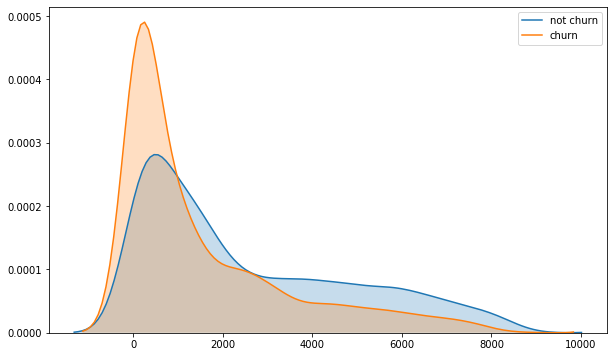

In [34]:
sns.kdeplot(data['TotalCharges'].loc[data['Churn'] == 0], label='not churn', shade=True);
sns.kdeplot(data['TotalCharges'].loc[data['Churn'] == 1], label='churn', shade=True);

In [35]:
data['TotalCharges'].loc[data['Churn'] == 0].describe()

count    5163.000000
mean     2555.344141
std      2329.456984
min        18.800000
25%       577.825000
50%      1683.600000
75%      4264.125000
max      8672.450000
Name: TotalCharges, dtype: float64

In [36]:
data['TotalCharges'].loc[data['Churn'] == 1].describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

# Data Cleaning

In [37]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [38]:
data.loc[data.gender=='Male','gender'] = 1 
data.loc[data.gender=='Female','gender'] = 0

In [39]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [40]:
data.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [41]:
data.loc[data.Partner=='Yes','Partner'] = 1 
data.loc[data.Partner=='No','Partner'] = 0

In [42]:
data.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [43]:
data.loc[data.Dependents=='Yes','Dependents'] = 1 
data.loc[data.Dependents=='No','Dependents'] = 0

In [44]:
data.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [45]:
data['TenureCluster']=pd.qcut(data.tenure,
                              q=3,
                              labels=['0','1','2'])
data.groupby('TenureCluster').tenure.describe()

,count,mean,std,min,25%,50%,75%,max
TenureCluster,,,,,,,,
0,2371.0,5.408688,4.198602,0.0,1.0,4.0,9.0,14.0
1,2369.0,29.940059,9.641713,15.0,22.0,29.0,38.0,47.0
2,2303.0,62.630482,7.777547,48.0,56.0,64.0,70.0,72.0


In [46]:
data.drop(['tenure'], axis=1,inplace=True)

In [47]:
data.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [48]:
data.loc[data.PhoneService=='Yes','PhoneService'] = 1 
data.loc[data.PhoneService=='No','PhoneService'] = 0

In [49]:
data.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [50]:
data['MultipleLines']=np.where(data['MultipleLines'] =='No phone service',
                               'No', data['MultipleLines'])
data.loc[data.MultipleLines=='Yes','MultipleLines'] = 1 
data.loc[data.MultipleLines=='No','MultipleLines'] = 0

In [51]:
data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [52]:
data['InternetService']=np.where(data['InternetService'] =='DSL', 'Yes', data['InternetService'])
data['InternetService']=np.where(data['InternetService'] =='Fiber optic', 'Yes', data['InternetService'])
data.loc[data.InternetService=='Yes','InternetService'] = 1 
data.loc[data.InternetService=='No','InternetService'] = 0

In [53]:
data.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [54]:
data['OnlineSecurity']=np.where(data['OnlineSecurity'] =='No internet service',
                                'No', data['OnlineSecurity'])
data.loc[data.OnlineSecurity=='Yes','OnlineSecurity'] = 1 
data.loc[data.OnlineSecurity=='No','OnlineSecurity'] = 0

In [55]:
data.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [56]:
data['OnlineBackup']=np.where(data['OnlineBackup'] =='No internet service',
                              'No', data['OnlineBackup'])
data.loc[data.OnlineBackup=='Yes','OnlineBackup'] = 1 
data.loc[data.OnlineBackup=='No','OnlineBackup'] = 0

In [57]:
data.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [58]:
data['DeviceProtection']=np.where(data['DeviceProtection'] =='No internet service',
                                  'No', data['DeviceProtection'])
data.loc[data.DeviceProtection=='Yes','DeviceProtection'] = 1 
data.loc[data.DeviceProtection=='No','DeviceProtection'] = 0

In [59]:
data.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [60]:
data['TechSupport']=np.where(data['TechSupport'] =='No internet service',
                             'No', data['TechSupport'])
data.loc[data.TechSupport=='Yes','TechSupport'] = 1 
data.loc[data.TechSupport=='No','TechSupport'] = 0

In [61]:
data.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [62]:
data['StreamingTV']=np.where(data['StreamingTV'] =='No internet service',
                             'No', data['StreamingTV'])
data.loc[data.StreamingTV=='Yes','StreamingTV'] = 1 
data.loc[data.StreamingTV=='No','StreamingTV'] = 0

In [63]:
data.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [64]:
data['StreamingMovies']=np.where(data['StreamingMovies'] =='No internet service',
                                 'No', data['StreamingMovies'])
data.loc[data.StreamingMovies=='Yes','StreamingMovies'] = 1 
data.loc[data.StreamingMovies=='No','StreamingMovies'] = 0

In [65]:
data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [66]:
data.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [67]:
data.loc[data.PaperlessBilling=='Yes','PaperlessBilling'] = 1 
data.loc[data.PaperlessBilling=='No','PaperlessBilling'] = 0

In [68]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [69]:
data['MonthlyChargesCluster']=pd.qcut(data.MonthlyCharges,
                                      q=3,
                                      labels=['0','1','2'])
data.groupby('MonthlyChargesCluster').MonthlyCharges.describe()

,count,mean,std,min,25%,50%,75%,max
MonthlyChargesCluster,,,,,,,,
0,2351.0,27.988622,10.690495,18.25,19.95,21.15,35.55,50.40
1,2345.0,69.036333,9.591927,50.45,60.30,70.35,76.90,83.90
2,2347.0,97.326438,8.777709,83.95,89.85,96.10,104.40,118.75


In [70]:
data.drop(['MonthlyCharges'], axis=1,inplace=True)

In [71]:
data['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [72]:
data['TotalChargesCluster']=pd.qcut(data.TotalCharges,
                                      q=3,
                                      labels=['0','1','2'])
data.groupby('TotalChargesCluster').TotalCharges.describe()

,count,mean,std,min,25%,50%,75%,max
TotalChargesCluster,,,,,,,,
0,2344.0,247.125661,193.610527,18.80,74.3500,197.850,401.35,678.2
1,2344.0,1499.374104,566.827913,678.45,1023.9375,1397.475,1902.85,2745.2
2,2344.0,5103.401557,1530.169806,2745.70,3795.2125,4920.125,6288.65,8684.8


In [73]:
data.drop(['TotalCharges'], axis=1,inplace=True)

# Create dummy variables

That is variables with only two values, zero and one.

In [74]:
cat_vars=['gender', 'SeniorCitizen','Partner', 'Dependents',
               'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
               'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod',
               'TenureCluster','MonthlyChargesCluster','TotalChargesCluster']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['gender', 'SeniorCitizen','Partner', 'Dependents',
               'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
               'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod',
               'TenureCluster','MonthlyChargesCluster','TotalChargesCluster']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

Our final data columns will be:

In [75]:
data_final=data[to_keep]
data_final.columns.values

array(['customerID', 'Churn', 'gender_0', 'gender_1', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_0', 'Partner_1', 'Dependents_0',
       'Dependents_1', 'PhoneService_0', 'PhoneService_1',
       'MultipleLines_0', 'MultipleLines_1', 'InternetService_0',
       'InternetService_1', 'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineBackup_0', 'OnlineBackup_1', 'DeviceProtection_0',
       'DeviceProtection_1', 'TechSupport_0', 'TechSupport_1',
       'StreamingTV_0', 'StreamingTV_1', 'StreamingMovies_0',
       'StreamingMovies_1', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_0',
       'PaperlessBilling_1', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TenureCluster_0', 'TenureCluster_1', 'TenureCluster_2',
       'MonthlyChargesCluster_0', 'MonthlyChargesCluster_1',
       'MonthlyChargesCluster_2', 

In [76]:
data_final.drop(['customerID'], axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
data_final.describe()

,Churn,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,...,PaymentMethod_Mailed check,TenureCluster_0,TenureCluster_1,TenureCluster_2,MonthlyChargesCluster_0,MonthlyChargesCluster_1,MonthlyChargesCluster_2,TotalChargesCluster_0,TotalChargesCluster_1,TotalChargesCluster_2
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.495244,0.504756,0.837853,0.162147,0.516967,0.483033,0.700412,0.299588,0.096834,...,0.228880,0.336646,0.336362,0.326991,0.333807,0.332955,0.333239,0.332813,0.332813,0.332813
std,0.441561,0.500013,0.500013,0.368612,0.368612,0.499748,0.499748,0.458110,0.458110,0.295752,...,0.420141,0.472596,0.472498,0.469147,0.471605,0.471304,0.471405,0.471254,0.471254,0.471254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
data_final.shape

(7043, 45)

# Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-subscription using the __SMOTE algorithm__ (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.

2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [79]:
X = data_final.loc[:, data_final.columns != 'Churn']
y = data_final.loc[:, data_final.columns == 'Churn']
y=y.astype('int')

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns1= X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns1)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])
# we can Check the numbers of our data
print("\033[1m length of oversampled data is ",len(os_data_X))
print("\033[1m Number of no churn in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("\033[1m Number of churn",len(os_data_y[os_data_y['Churn']==1]))
print("\033[1m Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("\033[1m Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

 length of oversampled data is  7228
 Number of no churn in oversampled data 3614
 Number of churn 3614
 Proportion of no churn data in oversampled data is  0.5
 Proportion of churn data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination

__Recursive Feature Elimination (RFE)__ is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [80]:
data_final_vars=data_final.columns.values.tolist()
y=['Churn']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[ True  True  True  True  True  True False False False False False False
 False  True  True  True False False False False  True  True  True  True
  True  True  True  True False False False False False  True False  True
 False False False False  True False False False]
[ 1  1  1  1  1  1 13 14 18 22 12 11 25  1  1  1  6  7 16 17  1  1  1  1
  1  1  1  1 24 15  8  3  4  1  2  1 19 23 10  5  1  9 20 21]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [81]:
sf_X2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfe.ranking_},)
sf_X2.sort_values(by=['Importance'])

,Feature,Importance
0,gender_0,1
40,MonthlyChargesCluster_2,1
35,TenureCluster_0,1
33,PaymentMethod_Electronic check,1
27,Contract_One year,1
26,Contract_Month-to-month,1
25,StreamingMovies_1,1
24,StreamingMovies_0,1
23,StreamingTV_1,1
22,StreamingTV_0,1


In [82]:
cols=[]
for i in range (0, len(sf_X2["Importance"])):
    if sf_X2["Importance"][i] == 1:
        cols.append(sf_X2["Feature"][i])
print(cols)
print(len(cols))

['gender_0', 'gender_1', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_0', 'Partner_1', 'InternetService_1', 'OnlineSecurity_0', 'OnlineSecurity_1', 'TechSupport_0', 'TechSupport_1', 'StreamingTV_0', 'StreamingTV_1', 'StreamingMovies_0', 'StreamingMovies_1', 'Contract_Month-to-month', 'Contract_One year', 'PaymentMethod_Electronic check', 'TenureCluster_0', 'MonthlyChargesCluster_2']
20


In [83]:
cols=['gender_0', 'gender_1', 'SeniorCitizen_0', 'SeniorCitizen_1'
      , 'Partner_0', 'Partner_1', 'InternetService_1', 'OnlineSecurity_0',
      'OnlineSecurity_1', 'TechSupport_0', 'TechSupport_1', 'StreamingTV_0',
      'StreamingTV_1', 'StreamingMovies_0', 'StreamingMovies_1', 'Contract_Month-to-month',
      'Contract_One year', 'PaymentMethod_Electronic check', 'TenureCluster_0',
      'MonthlyChargesCluster_2']
X=os_data_X[cols]
y=os_data_y['Churn']

# Implementing the model

In [84]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.574858
         Iterations 11
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.171    
Dependent Variable:      Churn                 AIC:                   8350.1504
Date:                    2020-05-20 05:39      BIC:                   8487.8647
No. Observations:        7228                  Log-Likelihood:        -4155.1  
Df Model:                19                    LL-Null:               -5010.1  
Df Residuals:            7208                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          11.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------

The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.

In [85]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
gender_0,1.401550e-07
gender_1,7.288219e-03
SeniorCitizen_0,1.828982e-03
SeniorCitizen_1,7.536511e-03
Partner_0,2.550067e-03
Partner_1,1.676405e-05
InternetService_1,7.509281e-52
OnlineSecurity_0,2.257167e-03
OnlineSecurity_1,3.369245e-05
TechSupport_0,1.129051e-02


In [86]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])
print(pvs)
print(len(pvs)) 

['gender_0', 'gender_1', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_0', 'Partner_1', 'InternetService_1', 'OnlineSecurity_0', 'OnlineSecurity_1', 'TechSupport_0', 'TechSupport_1', 'StreamingTV_0', 'StreamingTV_1', 'StreamingMovies_0', 'StreamingMovies_1', 'Contract_Month-to-month', 'Contract_One year', 'PaymentMethod_Electronic check', 'TenureCluster_0']
19


In [87]:
pvs = ['gender_0', 'gender_1', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_0', 'Partner_1', 'InternetService_1', 'OnlineSecurity_0',
       'OnlineSecurity_1', 'TechSupport_0', 'TechSupport_1', 'StreamingTV_0',
       'StreamingTV_1', 'StreamingMovies_0', 'StreamingMovies_1', 'Contract_Month-to-month',
       'Contract_One year', 'PaymentMethod_Electronic check', 'TenureCluster_0']
X=os_data_X[pvs]
y=os_data_y['Churn']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.575640
         Iterations 11
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.170    
Dependent Variable:      Churn                 AIC:                   8359.4547
Date:                    2020-05-20 05:39      BIC:                   8490.2833
No. Observations:        7228                  Log-Likelihood:        -4160.7  
Df Model:                18                    LL-Null:               -5010.1  
Df Residuals:            7209                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          11.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------

In [88]:
X=os_data_X[pvs]
y=os_data_y['Churn']

# Logistic Regression Model Fitting

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_pred = logreg.predict(X_test)
print("\033[1m Accuracy of the Logistic Regression model on test set:",
      '{:.2f}'.format(logreg.score(X_test, y_test)))

 Accuracy of the Logistic Regression model on test set: 0.83


## Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[898 177]
 [202 892]]


In [92]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1790 correct predictions.
 The result is telling us that we have:  379 incorrect predictions.
 We have a total predictions of:  2169


## Compute precision, recall, F-measure and support

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1075
           1       0.83      0.82      0.82      1094

    accuracy                           0.83      2169
   macro avg       0.83      0.83      0.83      2169
weighted avg       0.83      0.83      0.83      2169



In [94]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Logistic Regression model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Logistic Regression model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic\nRegression model predicted a customer is going to churn the company, that customer actually churned","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Logistic Regression model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a customer who churned the company present in the test set, our Logistic Regression model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Logistic Regression model: 82.53%
Well, you got a classification rate of 82.53%

Precision of Logistic Regression model: 83.44%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic
Regression model predicted a customer is going to churn the company, that customer actually churned 83.44% of
 the time.

Recall of Logistic Regression model: 81.54%
Recall: If there is a customer who churned the company present in the test set, our Logistic Regression model
can identify it 81.54% of the time.


## ROC Curve

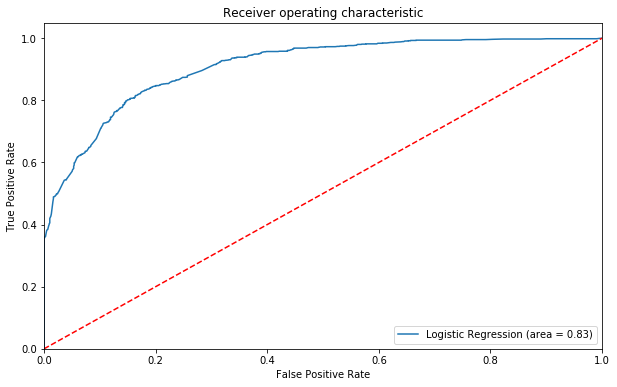

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Real-time Prediction

Finally, the best way to use this model is assigning Churn Probability for each customer, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:

In [96]:
data['Prob_to_Churn'] = logreg.predict_proba(data[X_train.columns])[:,1]

Our dataset looks like below at the end:

Finally, the best way to use this model is assigning Churn Probability for each customer, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:

In [97]:
data[['customerID','Prob_to_Churn']].head(10)

,customerID,Prob_to_Churn
0,7590-VHVEG,0.708291
1,5575-GNVDE,0.069116
2,3668-QPYBK,0.481577
3,7795-CFOCW,0.035746
4,9237-HQITU,0.753835
5,9305-CDSKC,0.868232
6,1452-KIOVK,0.487761
7,6713-OKOMC,0.473689
8,7892-POOKP,0.458246
9,6388-TABGU,0.069116


In [98]:
data.to_csv('Prob_to_Churn.csv', index=False, encoding='utf-8')